In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist

In [2]:
# Data: Brisbane_CityBike
df = pd.read_json("Brisbane_CityBike.json")
df.head()

,address,latitude,longitude,name,number
0,Lower River Tce / Ellis St,-27.482279,153.028723,122 - LOWER RIVER TCE / ELLIS ST,122
1,Main St / Darragh St,-27.470590,153.036046,91 - MAIN ST / DARRAGH ST,91
2,Sydney St Ferry Terminal / Park,-27.474531,153.042728,88 - SYDNEY ST FERRY TERMINAL / PARK,88
3,Browne St / James St,-27.461881,153.046986,75 - BROWNE ST / JAMES ST,75
4,Kurilpa Point / Montague Rd,-27.469658,153.016696,98 - KURILPA POINT / MONTAGUE RD,98


In [3]:
# Checking the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
address      149 non-null object
latitude     149 non-null float64
longitude    149 non-null float64
name         149 non-null object
number       149 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.9+ KB


In [4]:
#Extracting the coordinates
coord = df.loc[:,['latitude','longitude']]

In [5]:
K = range(1,11)  

KM = [kmeans(coord,k) for k in K] # apply kmeans 1 to 10
centroids = [cent for (cent,var) in KM]   # cluster centroids

Dk = [cdist(coord, cent, 'euclidean') for cent in centroids]

dist = [np.min(D,axis=1) for D in Dk]
avgWithinSS = [sum(d)/coord.shape[0] for d in dist]  

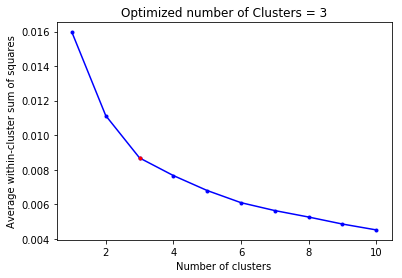

In [6]:
kIdx = 2
# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b.-')
ax.plot(K[2], avgWithinSS[2], 'r.')
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title(str('Optimized number of Clusters = ') + str(K[2]))  
plt.show()

In [7]:
#K-Means clustering
idn = K[2]   #number of clusters
kmeans = KMeans(n_clusters=idn, random_state=1).fit(coord)
label=kmeans.labels_

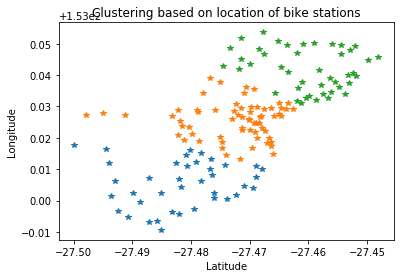

In [8]:
plt.ylabel('Longitude')
plt.xlabel('Latitude')
for i in range(idn):
    cluster=np.where(label==i)[0]
    plt.plot(coord.latitude[cluster].values,coord.longitude[cluster].values,'*')
plt.title('Clustering based on location of bike stations')  
plt.show()